## Exemplos de Grids

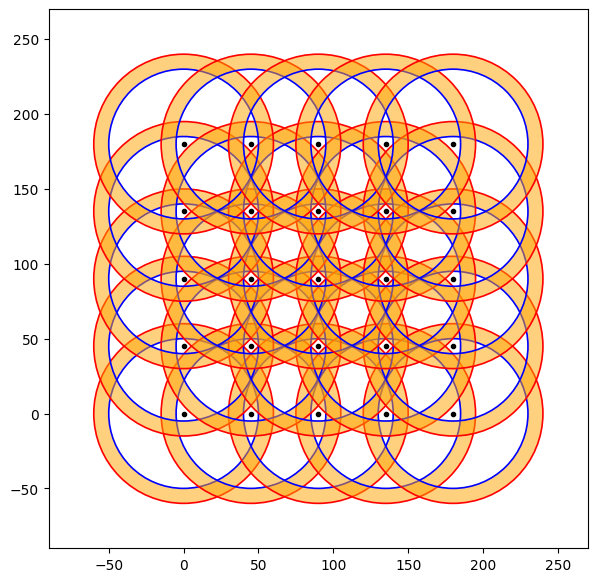

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

def plot_grid_with_circles(rows, cols, d, R_c, R_i):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,7)
    ax.set_aspect("equal")
    
    for i in range(rows):
        for j in range(cols):
            x = j * d
            y = i * d
            
            # Anel laranja entre Rc e Ri
            ring = Wedge(center=(x, y), r=R_i, theta1=0, theta2=360,
                         width=R_i - R_c, facecolor="orange", alpha=0.5, edgecolor=None)
            ax.add_patch(ring)

            # Interior do círculo interno
            #circle_fill = plt.Circle((x, y), R_c, facecolor="green", alpha=0.5, edgecolor=None)
            #ax.add_patch(circle_fill)

            circle_inner = plt.Circle((x, y), R_c, color="blue", fill=False, linewidth=1.2)
            
            circle_outer = plt.Circle((x, y), R_i, color="red", fill=False, linewidth=1.2)
            
            ax.add_patch(circle_outer)
            ax.add_patch(circle_inner)
            
            ax.plot(x, y, "ko", markersize=3)
    
    ax.set_xlim(-2*d, cols * d + d)
    ax.set_ylim(-2*d, rows * d + d)
    plt.show()

# Exemplo de uso
plot_grid_with_circles(rows=5, cols=5, d=45, R_c=50, R_i=60)


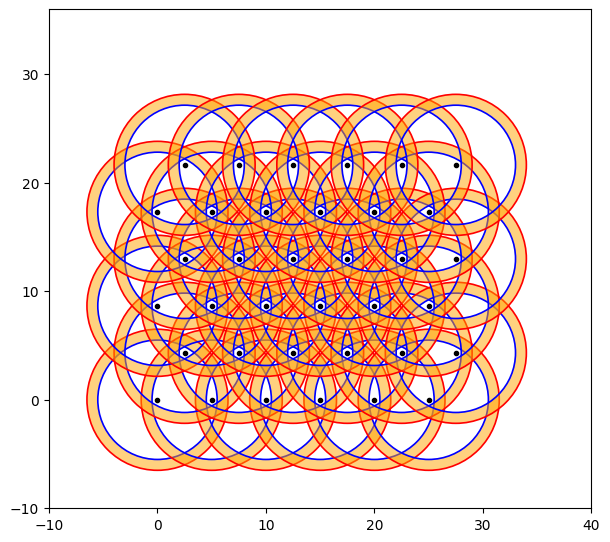

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import math

def plot_grid_with_circles(rows, cols, d, R_c, R_i):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,7)
    ax.set_aspect("equal")

    # fator de altura para grid triangular (hexagonal)
    dy = d * math.sqrt(3) / 2  

    for i in range(rows):
        for j in range(cols):
            # desloca colunas alternadas
            x = j * d + (i % 2) * (d / 2)
            y = i * dy

            # Anel laranja entre Rc e Ri
            ring = Wedge(center=(x, y), r=R_i, theta1=0, theta2=360,
                         width=R_i - R_c, facecolor="orange", alpha=0.5, edgecolor=None)
            ax.add_patch(ring)
            
            # círculos
            circle_inner = plt.Circle((x, y), R_c, color="blue", fill=False, linewidth=1.2)
            circle_outer = plt.Circle((x, y), R_i, color="red", fill=False, linewidth=1.2)

            ax.add_patch(circle_outer)
            ax.add_patch(circle_inner)

            # ponto central
            ax.plot(x, y, "ko", markersize=3)

    ax.set_xlim(-2*d, cols * d + 2*d)
    ax.set_ylim(-2*d, rows * dy + 2*d)
    plt.show()

# Exemplo
plot_grid_with_circles(rows=6, cols=6, d=5, R_c=5.5, R_i=6.5)


In [16]:
!pip install shapely

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.7 MB 2.0 MB/s eta 0:00:01
     ----------- ---------------------------- 0.5/1.7 MB 5.2 MB/s eta 0:00:01
     ------------------------------- -------- 1.4/1.7 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 4.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


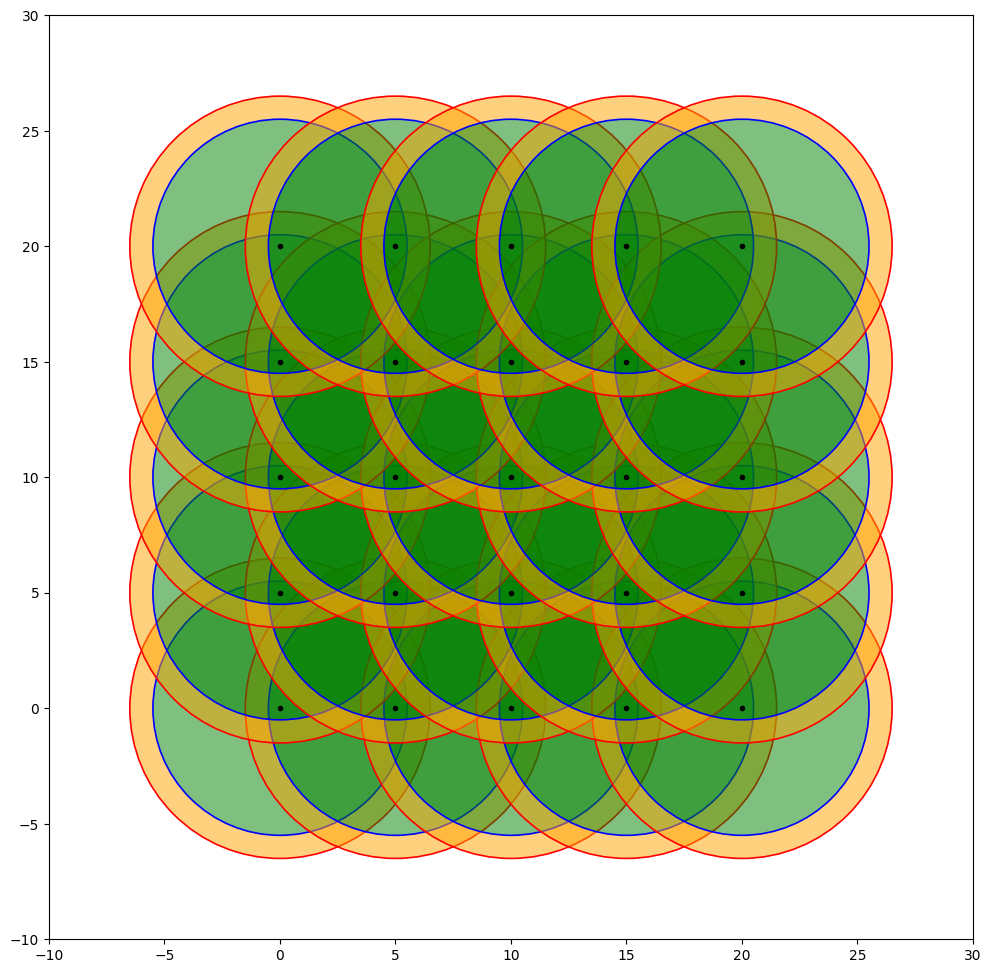

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Wedge, Circle
from shapely.geometry import Point

def plot_grid_with_circles(rows, cols, d=5, R_c=5.5, R_i=6.5):
    fig, ax = plt.subplots()
    fig.set_size_inches(12,12)
    ax.set_aspect("equal")
    
    for i in range(rows):
        for j in range(cols):
            x = j * d
            y = i * d

            # Cria geometria do círculo interno e externo
            circle_inner_geom = Point(x, y).buffer(R_c, resolution=256)
            circle_outer_geom = Point(x, y).buffer(R_i, resolution=256)
            ring_geom = circle_outer_geom.difference(circle_inner_geom)

            # Polígono verde: diferença entre círculo interno e anel
            green_geom = circle_inner_geom.difference(ring_geom)

            # Adiciona anel laranja
            ring_patch = Wedge(center=(x, y), r=R_i, theta1=0, theta2=360,
                               width=R_i - R_c, facecolor="orange", alpha=0.5, edgecolor=None)
            ax.add_patch(ring_patch)

            # Adiciona polígono verde só na parte que não intersecta o anel
            if not green_geom.is_empty:
                xg, yg = green_geom.exterior.xy
                ax.fill(xg, yg, facecolor="green", alpha=0.5)

            # Bordas
            ax.add_patch(Circle((x, y), R_c, color="blue", fill=False, linewidth=1.2))
            ax.add_patch(Circle((x, y), R_i, color="red", fill=False, linewidth=1.2))

            # Centro
            ax.plot(x, y, "ko", markersize=3)

    ax.set_xlim(-2*d, cols * d + d)
    ax.set_ylim(-2*d, rows * d + d)
    plt.show()

# Exemplo de uso
plot_grid_with_circles(rows=5, cols=5)
